In [11]:
import shap
import numpy as np


# Enlace
Guardar este enlace como oro en paño. Repo del MIT con recopilación de las XAI para timeseries
https://github.com/JHoelli/Awesome-Time-Series-Explainability#Regression-/-Forecasting

## Tree explainer

In [ ]:
# Datos ficticios de ejemplo
X = np.random.rand(100, 5)  # Un conjunto de datos de 100 muestras con 5 características

# Modelo de ejemplo (puede ser cualquier modelo)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, np.random.rand(100))  # Entrenar el modelo con datos ficticios


In [9]:
type(X)

numpy.ndarray

In [3]:
#Crear un explainer de SHAP
explainer = shap.Explainer(model, X)


In [10]:
explainer

In [6]:
# Calcular los valores SHAP para un conjunto de muestras (por ejemplo, las primeras 10 muestras)
sample_indices = range(10)  # Índices de las muestras que deseas explicar
shap_values = explainer.shap_values(X[sample_indices])

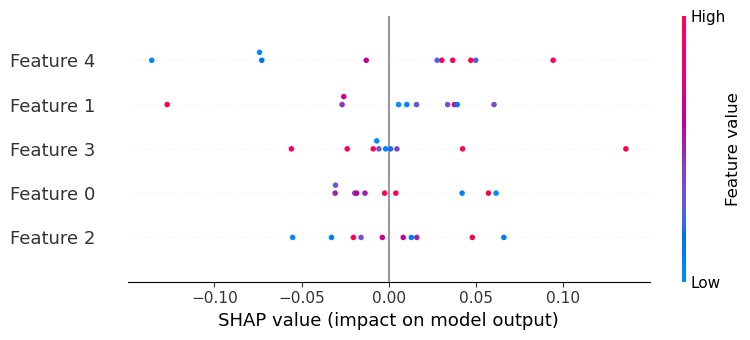

In [7]:
# Visualizar los valores SHAP para el conjunto de muestras
shap.summary_plot(shap_values, X[sample_indices])

## Linear explainer

In [15]:
import shap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
np.random.seed(0)
X_train = np.random.rand(100, 5)
y_train = np.random.rand(100)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
shap_values = explainer.shap_values(X_train)

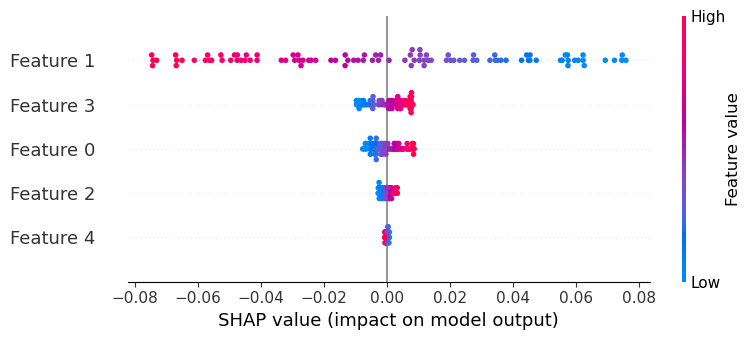

In [37]:
shap.summary_plot(shap_values, X_train)

In [38]:
explainer

## KernelExplainer (Neural Network) 
> ChatGPT recomienda este para MVP, pero falla. Por eso estoy montando estos tests

In [39]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [40]:
# Crear un conjunto de datos sintético
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 muestras, 5 características
y = 2 * X[:, 0] + 3 * X[:, 1] - 0.5 * X[:, 2] + np.random.randn(100)  # Regresión lineal simple

In [41]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [42]:
# Definir una red neuronal simple
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        return x

In [43]:
# Crear la instancia del modelo y definir la función de pérdida y el optimizador
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [44]:
# Entrenar el modelo
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()

In [45]:
import shap

In [48]:
def model_predict(input_data):
    input_tensor = torch.tensor(input_data, dtype=torch.float32)
    with torch.no_grad():
        output_tensor = model(input_tensor)
    return output_tensor.numpy()

In [49]:
# Crear un Explainer de Kernel
X_numpy = X_tensor.numpy()
explainer = shap.KernelExplainer(model_predict, X)

In [60]:
explainer

In [56]:
# Calcular los valores SHAP para una muestra de datos
sample_index = range(10) # Puedes elegir una muestra específica para explicar
shap_values = explainer.shap_values(X[sample_index])

  0%|          | 0/10 [00:00<?, ?it/s]

In [57]:
# Imprimir los valores SHAP
print(shap_values)

[array([[ 6.39123499e-02,  1.69702087e-01,  4.73453118e-02,
         1.30028353e-03, -4.51421380e-04],
       [ 1.48670039e-01, -5.51024689e-02,  1.44857385e-01,
         3.37446816e-01, -7.02211599e-04],
       [ 2.75989872e-01,  1.88392603e-02,  3.56311479e-02,
         3.06891859e-01, -2.65041351e-03],
       [-3.39167841e-01, -3.93091265e-01,  1.24899060e-01,
         1.88544642e-01,  2.33211736e-03],
       [ 4.39159828e-01,  2.37701116e-01, -3.24055672e-04,
         1.90448961e-01, -2.35586864e-03],
       [ 1.43455094e-01, -2.93375593e-01,  1.62704511e-01,
        -1.71893628e-02, -5.07506212e-04],
       [-1.84263218e-01,  2.17516701e-01, -2.12207836e-03,
         2.02040103e-02, -2.97626299e-03],
       [ 1.23998411e-01,  8.62160098e-02,  5.21265098e-02,
         3.21461700e-01,  1.15854166e-03],
       [-1.01363686e-01, -5.55521110e-02,  7.93537721e-02,
        -3.87725406e-01,  1.06463834e-03],
       [ 1.70272871e-01, -2.39094735e-01, -1.12527704e-01,
        -1.82878841e-0

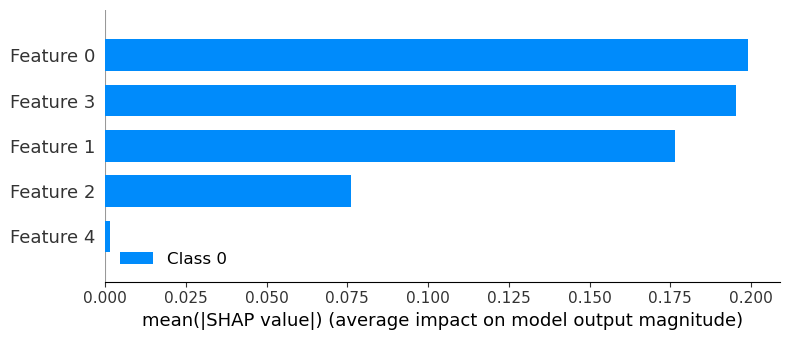

In [58]:
shap.summary_plot(shap_values, X)

In [59]:
X.shape

(100, 5)

## Serie temporal multivariable

In [109]:
import numpy as np
import hdbscan
import shap
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
np.random.seed(0)
n_samples = 100
n_features = 2
X = np.random.randn(n_samples, n_features)

In [104]:
# Calcular características (por ejemplo, media y desviación estándar) de la serie temporal
def extract_features(time_series):
    features = []
    features.append(np.mean(time_series))
    features.append(np.std(time_series))
    return np.array(features)

In [105]:
# Realizar clustering con HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(X)

In [106]:
def model_predict(input_data):
    return cluster_labels[input_data]

In [110]:
explainer = shap.KernelExplainer(model_predict, pd.DataFrame(X))

Provided model function fails when applied to the provided data set.


IndexError: arrays used as indices must be of integer (or boolean) type

In [102]:
# Calcular los valores SHAP para un clúster específico (por ejemplo, el clúster 0)
cluster_index = 0
cluster_indices = np.where(cluster_labels == cluster_index)[0]
shap_values = explainer.shap_values(cluster_indices)

# Visualizar los valores SHAP para entender el clúster (gráfico de dispersión)
plt.scatter(X[cluster_indices, 0], shap_values)
plt.xlabel("Feature 0")
plt.ylabel("Valores SHAP")
plt.title(f"Valores SHAP para el clúster {cluster_index} (Feature 0)")
plt.show()

IndexError: index 0 is out of bounds for axis 1 with size 0

# ..............

In [84]:
np.random.seed(0)
X = np.sin(np.linspace(0, 10, 100)) + np.random.randn(100) * 0.1

In [86]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(X.reshape(-1, 1))

In [87]:
cluster_labels

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,
        1,  1,  1,  1, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  1,  1,  1,  1])

In [76]:
# Crear un Explainer de Kernel para entender los clústeres
def model_predict(input_data):
    # Devuelve el número de clúster al que pertenece el punto de datos
    return np.array(cluster_labels[input_data])

In [92]:
explainer = shap.KernelExplainer(model_predict, np.arange(len(X)).reshape(-1,1))

In [93]:
cluster_index = 0
cluster_indices = np.where(cluster_labels == cluster_index)[0]
shap_values = explainer.shap_values(cluster_indices)

ValueError: x and y must be the same size

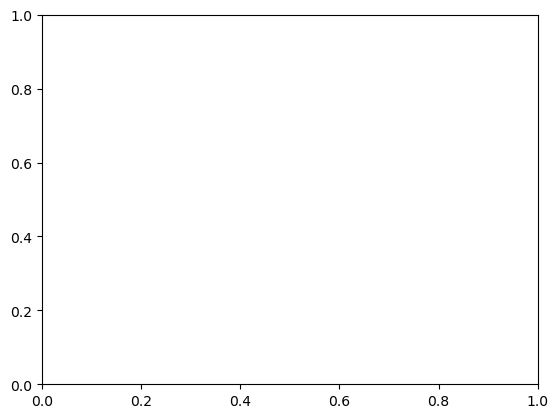

In [97]:
# Visualizar los valores SHAP para entender el clúster (gráfico de dispersión)
plt.scatter(X[cluster_indices], shap_values)
plt.xlabel("Datos")
plt.ylabel("Valores SHAP")
plt.title(f"Valores SHAP para el clúster {cluster_index}")
plt.show()

# ............

In [ ]:

# Calcular los valores SHAP para un punto de datos en un clúster específico
sample_index = 50  # Puedes elegir un punto de datos específico
shap_values = explainer.shap_values(sample_index)


In [ ]:
# Imprimir los valores SHAP para ese punto de datos
print(f"Valores SHAP para el punto {sample_index}: {shap_values}")

# Visualizar los valores SHAP para entender el clúster
shap.summary_plot(shap_values, X)